Nhat Tran <br>
METAD654: Marketing Analytics <br>
Professor Gregory Page

# Assignment 3 - Statistical Testing

## Part I: A/B Testing for User Spending

In [223]:
# Import necessary functions to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare

In [224]:
lobster_run = pd.read_csv("/Users/nhattran/Downloads/MSBA/METAD654 - Marketing Analytics/assignment 3/lobster_run.csv")

In [225]:
lobster_run.head()

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42


In [226]:
lobster_run.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
user_spend        0
dtype: int64

In [227]:
lobster_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          90189 non-null  int64  
 1   version         90189 non-null  object 
 2   sum_gamerounds  90189 non-null  int64  
 3   retention_1     90189 non-null  bool   
 4   retention_7     90189 non-null  bool   
 5   user_spend      90189 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [228]:
# Change datatype of version in the dataset to categorical variable
lobster_run[['version']] = lobster_run[['version']].astype('category')
lobster_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   userid          90189 non-null  int64   
 1   version         90189 non-null  category
 2   sum_gamerounds  90189 non-null  int64   
 3   retention_1     90189 non-null  bool    
 4   retention_7     90189 non-null  bool    
 5   user_spend      90189 non-null  float64 
dtypes: bool(2), category(1), float64(1), int64(2)
memory usage: 2.3 MB


In [229]:
lobster_run.describe()

,userid,sum_gamerounds,user_spend
count,90189.000000,90189.000000,90189.000000
mean,45095.000000,51.872457,15.015899
std,26035.466051,195.050858,2.747268
min,1.000000,0.000000,4.050000
25%,22548.000000,5.000000,13.170000
50%,45095.000000,16.000000,15.010000
75%,67642.000000,51.000000,16.870000
max,90189.000000,49854.000000,28.000000


In [230]:
# Show the row with the maximum sum_gamerounds
max_rounds = lobster_run.loc[lobster_run['sum_gamerounds'].idxmax()]
print(max_rounds)

userid                    57703
version           Gulf of Maine
sum_gamerounds            49854
retention_1               False
retention_7               False
user_spend                13.36
Name: 28650, dtype: object


In [231]:
# Filter rows where sum_gamerounds > 2000
high_rounds = lobster_run[lobster_run['sum_gamerounds'] > 2000]
print(high_rounds)

       userid         version  sum_gamerounds  retention_1  retention_7  \
3927     7913   Gulf of Maine            2961         True        False   
21685   43672   Gulf of Maine            2438         True        False   
23037   46345   Gulf of Maine            2251         True        False   
28650   57703   Gulf of Maine           49854        False        False   
43118   87008   Gulf of Maine            2156         True        False   
47967    6537  North Atlantic            2015         True         True   
59444   29418  North Atlantic            2640         True        False   
63193   36934  North Atlantic            2124         True         True   
68948   48189  North Atlantic            2294         True         True   
89253   88329  North Atlantic            2063         True         True   

       user_spend  
3927        11.28  
21685       12.57  
23037       18.00  
28650       13.36  
43118       17.68  
47967       10.41  
59444       15.47  
63193       15

In [232]:
# Filter rows where sum_gamerounds > 3000
high_rounds = lobster_run[lobster_run['sum_gamerounds'] > 3000]
print(high_rounds)

       userid        version  sum_gamerounds  retention_1  retention_7  \
28650   57703  Gulf of Maine           49854        False        False   

       user_spend  
28650       13.36  


In [233]:
max_spend = lobster_run.loc[lobster_run['user_spend'].idxmax()]
print(max_spend)

userid                     35202
version           North Atlantic
sum_gamerounds                42
retention_1                False
retention_7                False
user_spend                  28.0
Name: 62331, dtype: object


After running some basic checks on the dataset, I noticed an extreme outlier in sum_gamerounds - a value of 49,854 for userid = 57703, which is the only record exceeding 3,000 rounds. What’s interesting is that this user’s user_spend is actually lower than the average, and they didn’t return to the app after one day (retention_1) or seven days (retention_7) following the download. This would mean the user supposedly completed nearly 50,000 game rounds in a single day, which is highly unrealistic. It’s likely due to a data error or possibly a case of hacking. Because this outlier is so extreme compared to other high-ranking users and this is a large dataset (90189 entries), I decided to remove it to avoid distorting the analysis. 

In [234]:
lobster_run = lobster_run[lobster_run['sum_gamerounds'] <= 3000]

### A. Generate a histogram to view the user_spend variable.

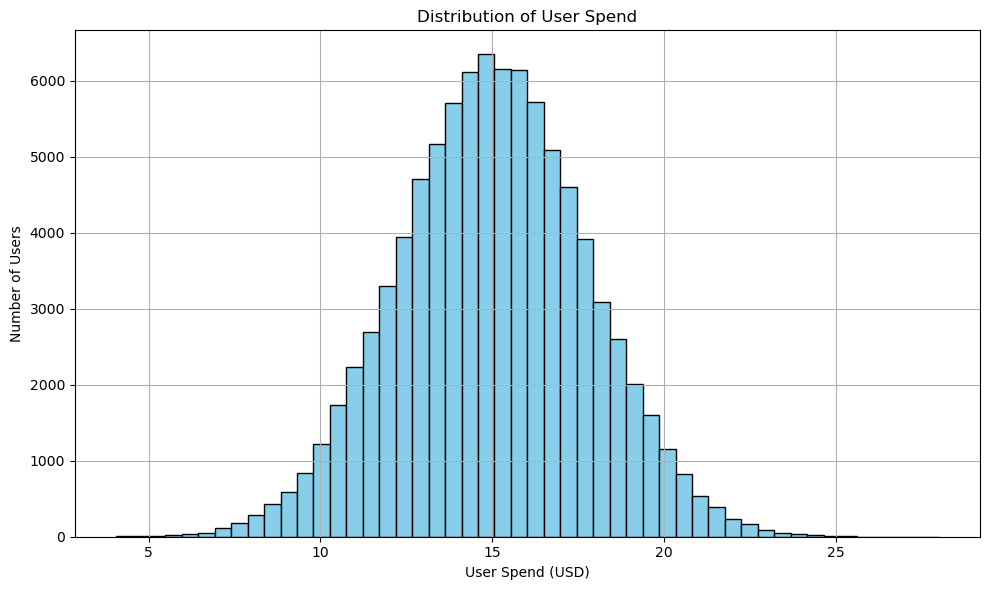

In [235]:
plt.figure(figsize=(10, 6))
plt.hist(lobster_run['user_spend'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of User Spend')
plt.xlabel('User Spend (USD)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

#### a. Describe your plot in 1-2 sentences.
The Distribution of User Spend histogram shows a clear bell-shaped pattern centered around $15, indicating that most users spend roughly this amount in the app. The distribution is fairly symmetric, with fewer users spending much less or more - ranging from less than \\$5 to more than \\$25, suggesting that spending behavior is consistent across the player base. Understanding this distribution can help the Lobster Land team design pricing strategies and in-app offers that align with typical user spending habits.


### B. Generate another histogram that depicts user_spend, but this time, use version as a color or hue variable.

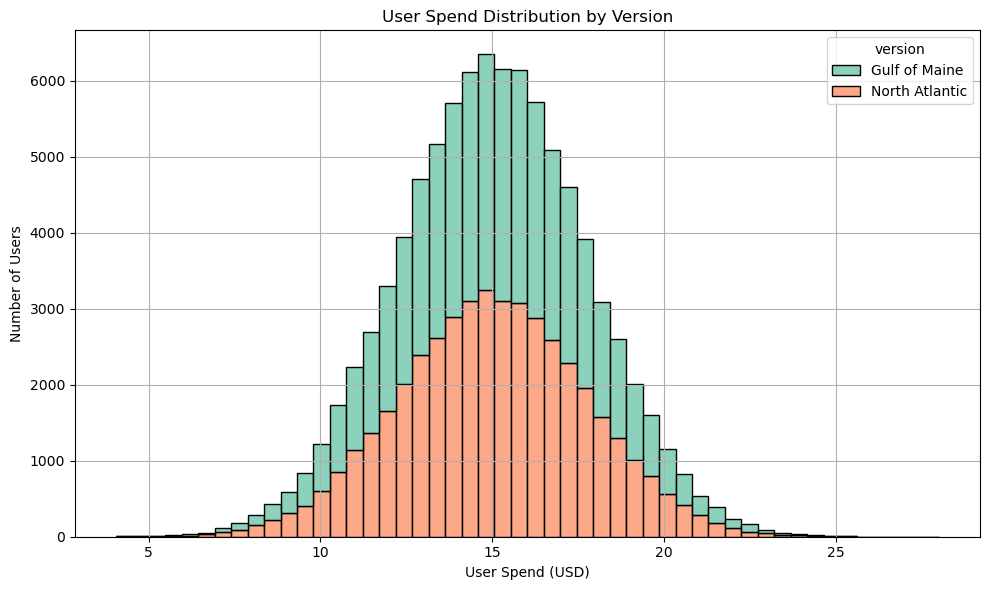

In [236]:
# Plot histogram with hue by version
plt.figure(figsize=(10, 6))
sns.histplot(data=lobster_run, x='user_spend', hue='version', bins=50, palette='Set2', multiple='stack', stat='count', edgecolor='black')
plt.title('User Spend Distribution by Version')
plt.xlabel('User Spend (USD)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

#### a. Describe your plot in 1-2 sentences.
The User Spend Distribution by Version histogram shows the distribution of user spend by Gulf of Maine vs. North Atlantic version, with both versions following a similar bell-shaped pattern centered around $15. However, users of the Gulf of Maine version appear to spend slightly more on average than those using the North Atlantic version. This suggests that the Gulf of Maine version may encourage higher in-app spending or greater engagement among players. The overall similarity shape between the two distributions indicates that spending behavior is consistent across versions, with only modest differences in average spend.

### C. Conduct a statistical test to check whether the user_spend variable is normally distributed.

In [237]:
# Run statistical test to check if user_spend is normally distributed
uspend_result = stats.normaltest(lobster_run['user_spend'])

print(f"Statistic = {uspend_result.statistic:.4f}")
print(f"p-value   = {uspend_result.pvalue:.4f}")

Statistic = 0.2353
p-value   = 0.8890


#### a. What is your test’s null hypothesis?
The test's null hypothesis: <br>
H0: The user_spend variable is normally distributed. <br>
H1: The user_spend variable is not normally distributed. <br>

This hypothesis tests whether the observed distribution of user_spend significantly deviates from a normal distribution, which is important for determining if standard statistical methods can be appropriately applied. Under H0, any deviation from normality is due to random variation, implying the data follow a normal pattern. Under H1, the deviations are systematic, indicating that user spend is not normally distributed.

In [238]:
alpha = 0.05
if uspend_result.pvalue > alpha:
    print("Fail to reject H0: user_spend looks normally distributed.")
else:
    print("Reject H0: user_spend is not normally distributed.")

Fail to reject H0: user_spend looks normally distributed.


#### b . Based on the p-value that you see as a result, what can you say about the distribution of this variable?
Since the p-value = 0.8890, much greater than the common significance level of 0.05 - the test fail to reject the null hypothesis. This indicates that there is no strong statistical evidence suggesting the Lobster Land's user spending deviates from normality.

### D. Next, conduct an appropriate statistical test to check whether version has a significant impact on user spending. You can use any alpha value that you prefer to use for the significance threshold.

In [239]:
# Extract places from version where player begins
gulf_of_maine_spend = lobster_run[lobster_run['version'] == 'Gulf of Maine']['user_spend']
north_atlantic_spend = lobster_run[lobster_run['version'] == 'North Atlantic']['user_spend']

# Perform one-way Analysis of Variance (ANOVA) to compare user_spend across 2 versions
version_anova = stats.f_oneway(gulf_of_maine_spend, north_atlantic_spend)
print(f"Statistic = {version_anova.statistic:.4f}")
print(f"p-value   = {version_anova.pvalue:.4f}")

Statistic = 2.5264
p-value   = 0.1120


#### a. What was your null hypothesis?
The test's null hypothesis: <br>
H0: The mean user_spend is equal between Gulf of Maine and North Atlantic versions. <br>
H1: The mean user_spend is different between the two versions. <br>
In this analysis, I tested whether the product version (Gulf of Maine vs. North Atlantic) had a statistically significant effect on user spending. The null hypothesis (H0) assumed that the average user_spend was the same for both versions.

In [240]:
alpha = 0.05
if version_anova.pvalue > 0.05:
    print("Fail to reject H0: No significant difference in user_spend between versions.")
else:
    print("Reject H0: Version has a significant impact on user_spend.")

Fail to reject H0: No significant difference in user_spend between versions.


#### b . Based on the test, what will you conclude?
The ANOVA is chosen in this case because it allows me to compare the means of the user_spend variable across two product versions (Gulf of Maine and North Atlantic) to see if any observed differences are statistically significant. The test produced an F-statistic of 2.5264 and a p-value of 0.1120. Since the p-value is greater than the 0.05 significance level, I failed to reject the null hypothesis. This suggests that there isn’t a meaningful difference in average user spending between the two product versions, and any variation observed is likely due to random chance rather than an actual version effect.

## Part II: A/B Testing Two App Versions
### E. Next, generate some summary stats here -- group the observations by ‘version’and then compare the retention_1 and the retention_7 outcomes.

In [241]:
retention_summary = lobster_run.groupby('version',observed=True)[['retention_1', 'retention_7']].mean().round(6)
print(retention_summary)

                retention_1  retention_7
version                                 
Gulf of Maine      0.448198      0.19562
North Atlantic     0.442283      0.18200


#### a. How would you describe these results in general?
From the results, the average retention rates for both Day 1 and Day 7 are slightly higher in the Gulf of Maine version compared to the North Atlantic version. 
- **Day 1 retention:** Gulf of Maine (44.82%) vs. North Atlantic (44.23%)
- **Day 7 retention:** Gulf of Maine (19.56%) vs. North Atlantic (18.20%) <br>

Although the differences are minimal, the fact that they appear at both time points hints at a subtle but consistent pattern. Users of the Gulf of Maine version might be finding something slightly more engaging or user-friendly, which helps keep them around a bit longer. While this isn’t enough to draw firm conclusions without a statistical test, the trend suggests there could be small design or content differences that make the Gulf of Maine version more appealing over time.

### F. Use a binomial z-test to compare retention_1 between the two versions of the game.

In [242]:
from statsmodels.stats.proportion import proportions_ztest
# Count retained users per version
retained_count_rt1 = lobster_run.groupby('version', observed=True)['retention_1'].sum()
print("Retained users (retention_1):")
print(retained_count_rt1)

# Count total users per version
user_total_rt1 = lobster_run.groupby('version', observed=True)['retention_1'].count()
print("\nTotal users per version (retention_1):")
print(user_total_rt1)

Retained users (retention_1):
version
Gulf of Maine     20034
North Atlantic    20119
Name: retention_1, dtype: int64

Total users per version (retention_1):
version
Gulf of Maine     44699
North Atlantic    45489
Name: retention_1, dtype: int64


For retention day one, Gulf of Maine retained 20,034 out of 44,699 users, while North Atlantic retained 20,119 out of 45,489 users, showing nearly identical retention performance across both versions. This suggests that initial engagement is consistent regardless of which version users started with.

In [243]:
# Run binomial z-test to compare the 2 versions
z_stat1, p_value1 = proportions_ztest(count=retained_count_rt1, nobs=user_total_rt1)
print("Binomial Z-Test Results (retention_1):")
print(f"Z-statistic = {z_stat1:.4f}")
print(f"p-value     = {p_value1:.4f}")

Binomial Z-Test Results (retention_1):
Z-statistic = 1.7871
p-value     = 0.0739


In [244]:
alpha = 0.05
if p_value1 > 0.05:
    print("Fail to reject H0: No significant difference in day-1 retention between versions.")
else:
    print("Reject H0: Version has a significant impact on day-1 retention.")

Fail to reject H0: No significant difference in day-1 retention between versions.


#### a. What will be the null hypothesis of your test?
The test's null hypothesis: <br>
H0: Day-1 retention rates are equal between Gulf of Maine and North Atlantic versions. <br>
H1: Day-1 retention rates are different between versions. <br>

The results show a Z-statistic of 1.7871 and a p-value of 0.0739. Since this p-value is slightly above the 0.05 threshold, there isn’t enough evidence to say that the two versions differ in a statistically significant way. Though p-value is close enough to suggest a possible pattern. In other words, while the difference is not significant, it hints that the Gulf of Maine version might be performing a bit better, and Lobster Land should keep an eye on it for future marketing strategy.

#### b. Next, pick either version (Gulf of Maine or North Atlantic).
In this case, I chose a slighly better performer which is 'Gulf of Maine'.

In [245]:
gom_version = 'Gulf of Maine'

#### c. Then, find the number of users of your chosen version who stayed with the game for one day.

In [246]:
# The total users in Gulf of Maine version
gom_total = lobster_run[lobster_run['version'] == gom_version].shape[0]
print(f"The total users in Gulf of Maine is: {gom_total}")

# Filter out the retained users for Gulf of Maine after day 1
gom_retained1 = lobster_run[(lobster_run['version'] == gom_version) & 
    (lobster_run['retention_1'] == True)].shape[0]

print(f"The actual retained users after Day 1 in Gulf of Maine is: {gom_retained1}")

The total users in Gulf of Maine is: 44699
The actual retained users after Day 1 in Gulf of Maine is: 20034


#### d. Next, find the expected number of users who would have stayed with the game for one day, if your null hypothesis were true.

In [247]:
# Find the average retention_1 rate across all users of Lobster Land
avg_retention1 = lobster_run['retention_1'].mean()

# The expected number of users from Gulf of Maine that stayed after one day if the hypothesis were true
expect_retained1 = gom_total * avg_retention1

# Round number of users to the nearest integer
expect_retained1_round = round(expect_retained1)
print(f"The expected retained users in Gulf of Maine after Day 1 under H0: {expect_retained1_round}")

The expected retained users in Gulf of Maine after Day 1 under H0: 19901


#### What is this expected value? How did you arrive at this value?
The expected value shows how many users from the Gulf of Maine version I would expect to stay after Day 1 if the version had no effect on retention. To calculate this, I multiplied the total number of Gulf of Maine users by the overall day 1 retention rate across all users. I used the overall rate because, under the null hypothesis, I assume retention is independent of version. This gives me a baseline to compare against the actual retention in Gulf of Maine and helps me assess whether the observed difference is meaningful. 

After the calculation, the expected retained users in Gulf of Maine after day 1 is 19901 users. This version retained 20,034 users, compared to the expected 19,901 under the null hypothesis, meaning it held on to about 133 more users than anticipated. While this difference is small relative to the total user base, it suggests a slight positive deviation in retention performance for Gulf of Maine.

#### e. Now, conduct a binomial z-test to determine whether the retention_1 for the version you chose is meaningfully different from the expected number, given your null hypothesis.

In [248]:
# Run binomial z-test
z_stat, p_value = proportions_ztest(count=gom_retained1, nobs=gom_total, value=avg_retention1)

# Step 6: Print results
print("Binomial Z-Test for Gulf of Maine retention_1 vs expected under H0:")
print(f"Z-statistic = {z_stat:.4f}")
print(f"p-value     = {p_value:.4f}")

Binomial Z-Test for Gulf of Maine retention_1 vs expected under H0:
Z-statistic = 1.2684
p-value     = 0.2047


#### f. Based on the test, what will you conclude?
Based on the binomial z-test, the day 1 retention rate for the Gulf of Maine version does not differ significantly from what would be expected under the null hypothesis. The p-value of 0.2047 is greater than the conventional 0.05 threshold, so I fail to reject the null hypothesis. This result indicates that, given the available data, there isn’t sufficient evidence to conclude that the Gulf of Maine version has an effect on day 1 retention relative to the overall average. Lobster Land could improve this analysis by gathering more data or testing targeted design changes to better understand what drives early user retention.

### G. Again using a binomial z-test, compare the retention_7 outcomes for the two app versions.

In [249]:
# Count retained users per version by retention_7
retained_count_rt7 = lobster_run.groupby('version', observed=True)['retention_7'].sum()
print("Retained users (retention_7):")
print(retained_count_rt7)

# Count total users per version by retention 7
user_total_rt7 = lobster_run.groupby('version', observed=True)['retention_7'].count()
print("\nTotal users per version (retention_7):")
print(user_total_rt7)

Retained users (retention_7):
version
Gulf of Maine     8744
North Atlantic    8279
Name: retention_7, dtype: int64

Total users per version (retention_7):
version
Gulf of Maine     44699
North Atlantic    45489
Name: retention_7, dtype: int64


In [250]:
# Run binomial z-test to compare the 2 versions
z_stat7, p_value7 = proportions_ztest(count=retained_count_rt7, nobs=user_total_rt7)
print("Binomial Z-Test Results (retention_7):")
print(f"Z-statistic = {z_stat7:.4f}")
print(f"p-value     = {p_value7:.4f}")

Binomial Z-Test Results (retention_7):
Z-statistic = 5.2260
p-value     = 0.0000


In [251]:
alpha = 0.05
if p_value7 > 0.05:
    print("Fail to reject H0: No significant difference in day-7 retention between versions.")
else:
    print("Reject H0: Version has a significant impact on day-7 retention.")

Reject H0: Version has a significant impact on day-7 retention.


#### a. What will be the null hypothesis of your test?
The test's null hypothesis: <br>
H0: Day-7 retention rates are equal between Gulf of Maine and North Atlantic versions. <br>
H1: Day-7 retention rates are different between versions. <br>

I conducted a binomial z-test to compare day-7 retention between the Gulf of Maine and North Atlantic versions. The p-value was approximately 0.000, which is well below the standard significance level of 0.05. Therefore, I reject the null hypothesis and conclude that there is a statistically significant difference in day-7 retention between the two versions. This result suggests that users playing the Gulf of Maine version are more likely to remain active after 7 days compared to those playing the North Atlantic version.

#### b. Next, pick either version (Gulf of Maine or North Atlantic).
I still chose a slighly better performer which is 'Gulf of Maine'.

In [252]:
gom_version = 'Gulf of Maine'

#### c. Then, find the number of users of your chosen version who stayed with the game for one day.

In [253]:
# Filter out the retained users for Gulf of Maine after day 1
gom_retained7 = lobster_run[(lobster_run['version'] == gom_version) & 
    (lobster_run['retention_7'] == True)].shape[0]

print(f"The actual retained users after Day 7 in Gulf of Maine is: {gom_retained7}")

The actual retained users after Day 7 in Gulf of Maine is: 8744


#### d. Next, find the expected number of users who would have stayed with the game for one day, if your null hypothesis were true.

In [254]:
# Find the average retention 7 rate across all users of Lobster Land
avg_retention7 = lobster_run['retention_7'].mean()

# The expected number of users from Gulf of Maine that stayed after one day if the hypothesis were true
expect_retained7 = gom_total * avg_retention7
# Round number of users to the nearest integer
expect_retained7_round = round(expect_retained7)
print(f"The expected retained users in Gulf of Maine after Day 7 under H0: {expect_retained7_round}")

The expected retained users in Gulf of Maine after Day 7 under H0: 8437


#### What is this expected value? How did you arrive at this value?
The expected value here refers to the number of Gulf of Maine users I would anticipate being retained under the null hypothesis (H0), which assumes that day‑7 retention in Gulf of Maine is the same as the overall average retention rate across all users.

To calculate this, I take the total number of Gulf of Maine users and multiply by the overall day‑7 retention rate (the pooled proportion across both versions). This gives an expected retained count of 8,437 users. In other words, if Gulf of Maine behaved exactly like the overall user base, Lobster Land would expect about 8,437 users to remain by day 7.

#### e. Now, conduct a binomial z-test to determine whether the retention_1 for the version you chose is meaningfully different from the expected number, given your null hypothesis.

In [255]:
# Run binomial z-test
z_stat, p_value = proportions_ztest(count=gom_retained7, nobs=gom_total, value=avg_retention7)

# Step 6: Print results
print("Binomial Z-Test for Gulf of Maine retention_7 vs expected under H0:")
print(f"Z-statistic = {z_stat:.4f}")
print(f"p-value     = {p_value:.4f}")

Binomial Z-Test for Gulf of Maine retention_7 vs expected under H0:
Z-statistic = 3.6613
p-value     = 0.0003


#### f. Based on the test, what will you conclude?
The binomial z-test for Gulf of Maine’s day‑7 retention produced a Z‑statistic of 3.6613 with a p‑value of 0.0003, well below the 0.05 threshold, suggesting retention is higher than expected under the null hypothesis. Gulf of Maine retained 20,034 users by day 1 and continued to outperform expectations by day 7, with 8,437 users retained compared to the expected count. 

This suggests that while early retention looked similar across versions, Gulf of Maine is delivering a stronger long‑term engagement advantage. For Lobster Land, this is a clear signal that the Gulf of Maine version could be leveraged more aggressively in marketing and product strategy.

### H. Write a couple sentences of thoughts and/or recommendations for Lobster Land based on the overall results that you have found from the Super Lobster Run data and the statistical tests.
The Super Lobster Run experiment shows that the starting level didn’t have a major impact on day‑1 retention or spending, with both Gulf of Maine and North Atlantic versions retaining roughly 20,034 users initially. Retention differences on day 1 were not statistically significant (Z = 1.79, p = 0.074), but by day‑7, the Gulf of Maine version retained 8,437 users, showing a clear and statistically significant advantage (Z = 5.23, p < 0.05). This suggests that while early engagement was similar, Gulf of Maine may help maintain stronger long‑term retention.

Based on these findings, Lobster Land could consider emphasizing the Gulf of Maine level marketing strategies to leverage its retention advantage. They might also experiment with transferring successful design elements from Gulf of Maine - such as level design, difficulty pacing, or visual - into North Atlantic or future levels. Additionally, offering limited-time promotion booster packages for $0.99 or applying seasonal/holiday theme could encourage spending and interaction, potentially increasing engagement across all versions. To better understand the results, it would be useful to monitor retention beyond day‑7, track whether higher retention leads to increased long-term spending, and gather qualitative feedback to learn what aspects of Gulf of Maine are driving engagement.

### Part III: Chi-Square Goodness of Fit

In [256]:
# The data collected from the survey  Roller Coasters, Water Rides, Lobsterama Restaurant, Marine Life Exhibit, Lobsterland Merchandise Shop
observed = [150, 120, 90, 80, 60]
total = sum(observed)
print(f"The total of observed visitors from their favorite attraction at Lobster Land is: {total}.")

expected = [0.30 * total, 0.25 * total, 0.15 * total, 0.15 * total, 0.15 * total]

print("\nThe expected visitors at Lobster Land is:")
print(f"Roller Coasters: {expected[0]}")
print(f"Water Rides: {expected[1]}")
print(f"Lobsterama Restaurant: {expected[2]}")
print(f"Marine Life Exhibit: {expected[3]}")
print(f"Lobsterland Merchandise Shop: {expected[4]}")

The total of observed visitors from their favorite attraction at Lobster Land is: 500.

The expected visitors at Lobster Land is:
Roller Coasters: 150.0
Water Rides: 125.0
Lobsterama Restaurant: 75.0
Marine Life Exhibit: 75.0
Lobsterland Merchandise Shop: 75.0


### A. What is the null hypothesis of this test? What is the alternative hypothesis?
H0 - Null Hypothesis: The distribution of visitor preferences across the five attractions at Lobster Land matches the expected proportions provided by management:
- 30% Roller Coasters
- 25% Water Rides
- 15% Lobsterama Restaurant
- 15% Marine Life Exhibit
- 15% Merchandise Shop

H1 - Alternative hypothesis: The distribution of visitor preferences does not match the expected proportions.

The null hypothesis (H0) assumes that the distribution of visitor preferences across Lobster Land’s attractions: roller coasters, water rides, the seafood-themed food court, marine life exhibit, and lobster-themed merchandise shop which matches the proportions expected by the park’s management. Whereas, the alternative hypothesis (H1) suggests that visitor preferences differ enough from these expected proportions that the differences are unlikely to occur by chance, indicating that certain attractions may be more or less popular than anticipated, which could inform resource allocation and marketing strategies.

#### a. Under the null hypothesis, what is our expected number of respondents for roller coasters, water rides, Lobsterama Restaurant, Marine Life Exhibit, and the Lobsterland Merchandise Shop?
Since a total of 500 survey responses were collected, I calculated the expected number of respondents for each attraction by applying the expected percentages to this total. Lobster Land expects 30% of visitors to prefer roller coasters, which equals 150 respondents. For water rides, the expected proportion is 25%, resulting in 125 expected respondents. The remaining three attractions, Lobsterama Restaurant, the Marine Life Exhibit, and the Lobsterland Merchandise Shop, are each expected to receive 15% of the votes, corresponding to 75 respondents per attraction.

### B. Using both the expected values and the actual numbers that came from the survey respondents, run a chi-square goodness of fit test to assess your null hypothesis. Show your results.

In [257]:
# Conduct a chi-square goodness of fit
chisq, pvalue = chisquare(f_obs=observed, f_exp=expected)

print("\nThe chi-square value is: ", round(chisq, 4))
print("The p-value is: ", round(pvalue, 4))


The chi-square value is:  6.5333
The p-value is:  0.1627


In [258]:
alpha = 0.05
if pvalue > alpha:
    print("Fail to reject H0: The observed distribution does not differ significantly from the expected distribution.")
else:
    print("Reject H0: The observed distribution differ significantly from the expected distribution.")

Fail to reject H0: The observed distribution does not differ significantly from the expected distribution.


#### a. What is the p-value of this test? Based on this value, what will you conclude? 
The p-value of this chi-square goodness of fit test is 0.1627.

Since this p-value = 0.1627 is greater than the common significance level of 0.05, I fail to reject the null hypothesis. This means there is no statistically significant difference between the observed distribution of visitor preferences and the expected distribution provided by Lobster Land management.

In other words, the survey results do not provide enough evidence to conclude that visitor preferences differ from what management anticipated. The observed variation is likely due to random chance rather than a meaningful shift in attraction popularity. To improve the reliability of this test, Lobster Land could collect a larger sample of visitor responses to reduce sampling error and increase statistical power. Additionally, the management team could refine the expected distribution by providing more recent attendance data or seasonal trends, ensuring that the comparison reflects current visitor behavior more accurately.

### C. Demonstrate where the chi-square number from your test came from. Use Jupyter Notebook or Colab to do this, but do not use any Python libraries or modules.
Based on the results and datas that I retrieve from part A and B, once I have both the observed (O) and expected (E) counts, I am able to calculate the contribution of each cell to the overall chi-square statistic using this formula:

<img src="https://www.thoughtco.com/thmb/ns7d4DC1AqVGme2p1-WYqC26r_s=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/latex_ac74fec08532861eb5f8b87226ebf396-5c59a6fcc9e77c00016b4195.jpg">

The calculations for each attraction at Lobster Land are as follows:
- **Roller Coasters:** (150 − 150)^2/150 = 0.00
- **Water Rides:** (120 − 125)^2/125 = 0.20
- **Lobsterama Restaurant:** (90 − 75)^2/75 = 3.00
- **Marine Life Exhibit:** (80 − 75)^2/75 = 0.33
- **Merchandise Shop:** (60 − 75)^2/75 = 3.00

Finally, I sum these five contributions to obtain the overall chi-square statistic: <br>
X^2 = 0.00 + 0.20 + 3.00 + 0.33 + 3.00 = 6.53

The degrees of freedom in a chi‑square goodness‑of‑fit test are calculated as the number of categories minus one. Since there are 5 attraction categories at Lobster Land, the degrees of freedom are 5 − 1 = 4. With 4 degrees of freedom, the corresponding p‑value is approximately 0.1627. Since this p‑value is greater than the 0.05 threshold, I fail to reject the null hypothesis. In practical terms, this means the observed visitor preferences are not significantly different from the expected proportions, and the distribution of favorite attractions at Lobster Land is broadly consistent with the assumed model.

The results show that visitors’ attraction preferences are largely in line with what Lobster Land’s management expected, with only small differences in how often people chose the Lobsterama Restaurant and Merchandise Shop. The chi-square value of 6.53 and p-value of 0.1627 suggest that these variations aren’t statistically significant, or the overall pattern of visitor preferences are pretty consistent with the original expectations. Though, as Lobster Land expands its engagement through the “Super Lobster Run” game, it could benefit from collecting data from a larger and more diverse group of users throughout the year to identify any seasonal shifts in interest. Updating expected values to reflect new attractions or marketing efforts could also help the park fine-tune its offerings and digital strategy.

## Part IV: Wildcard

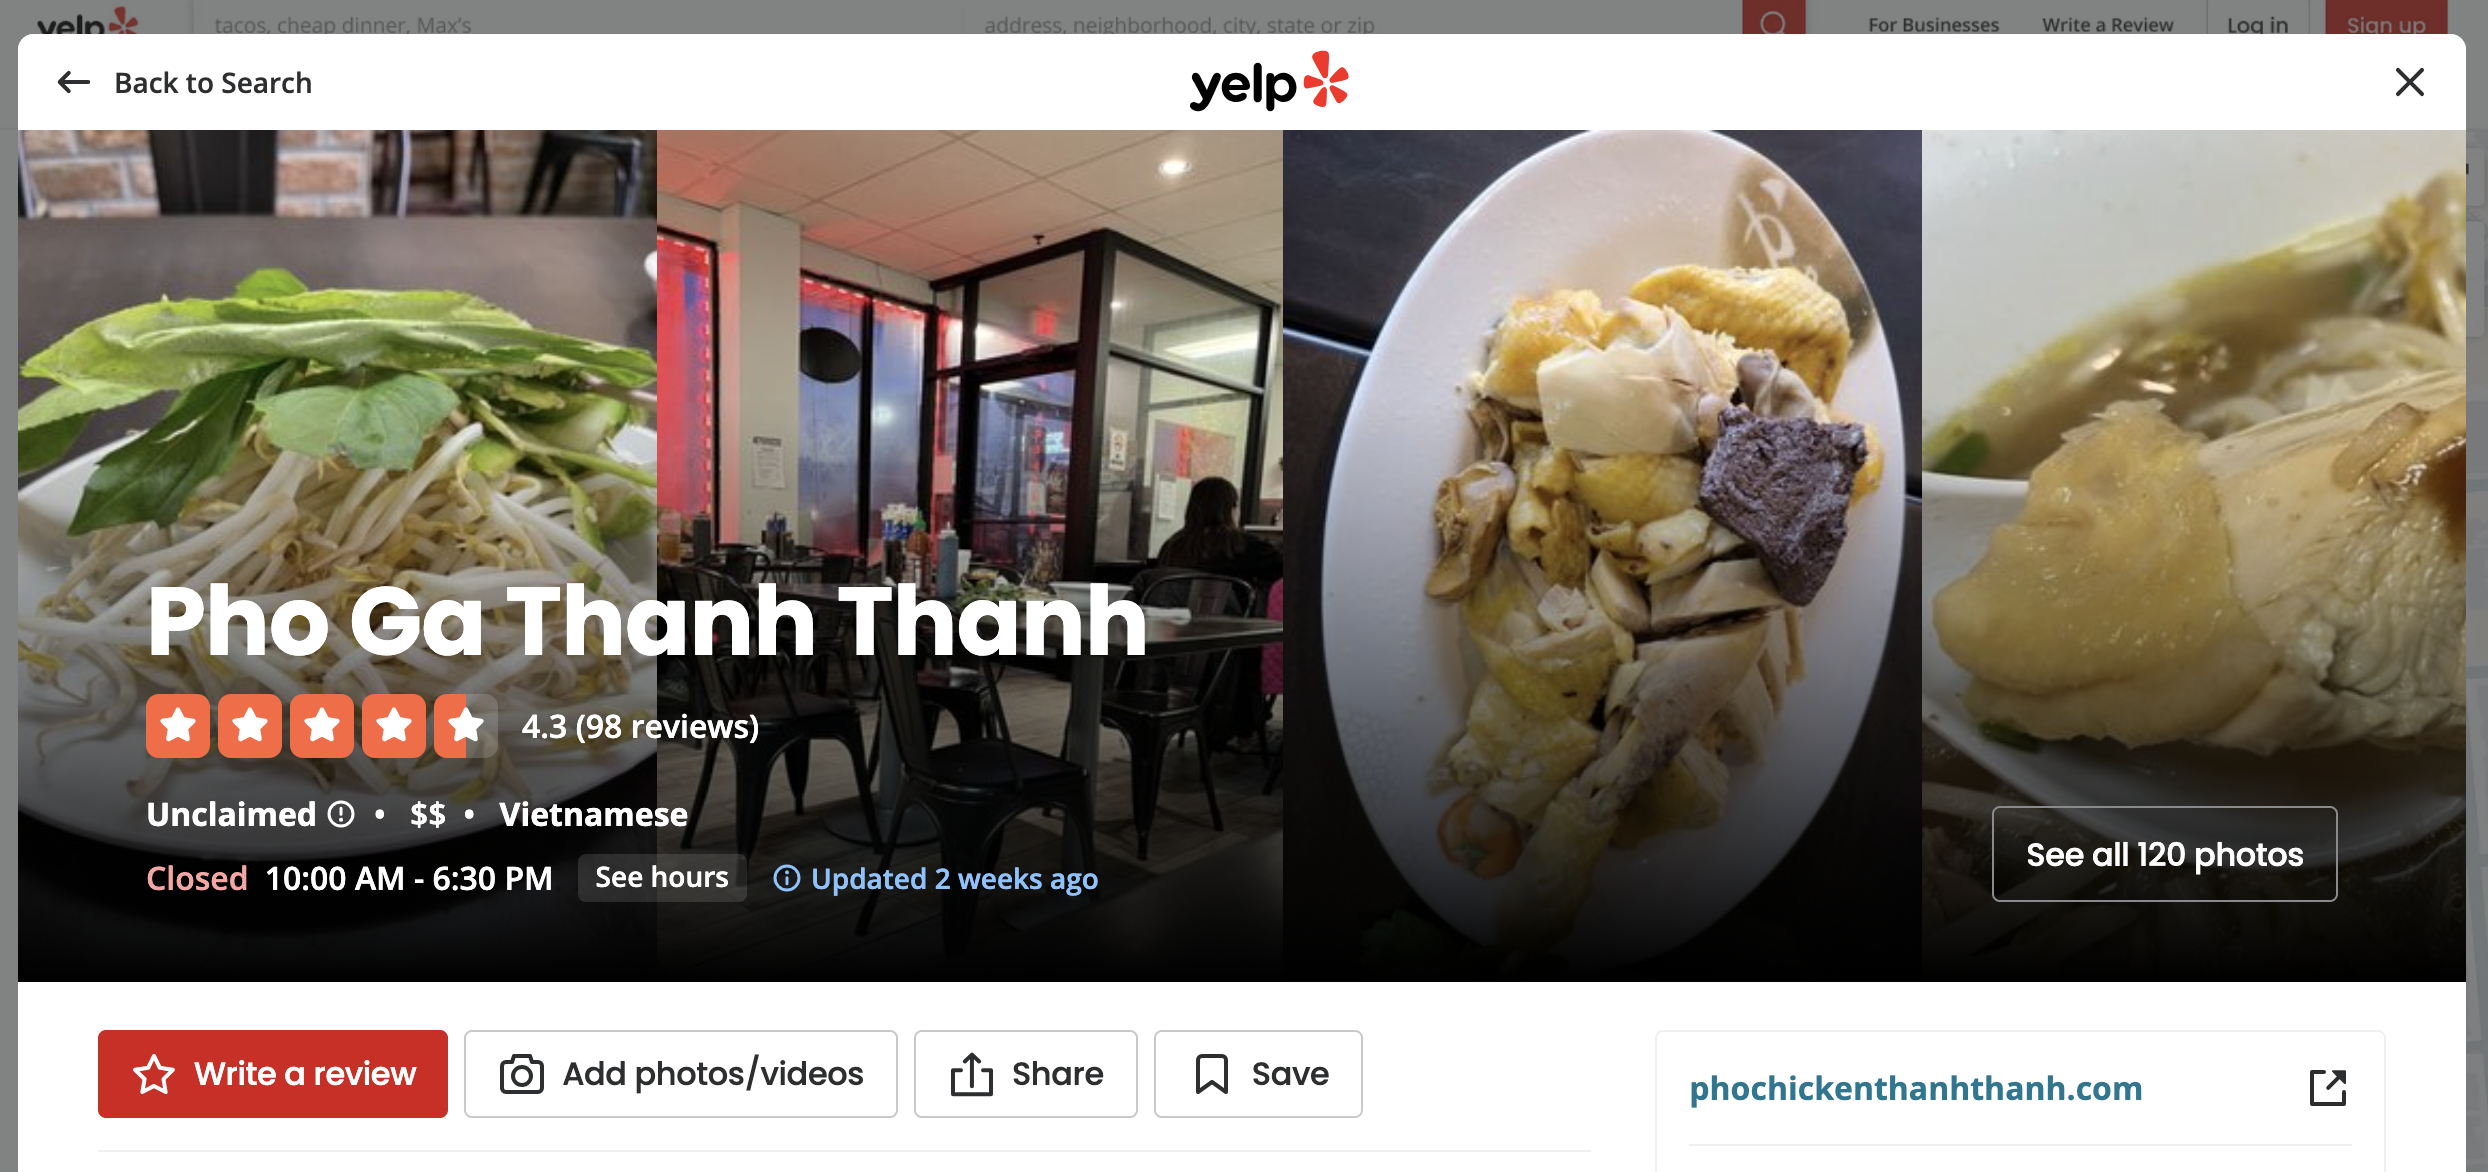

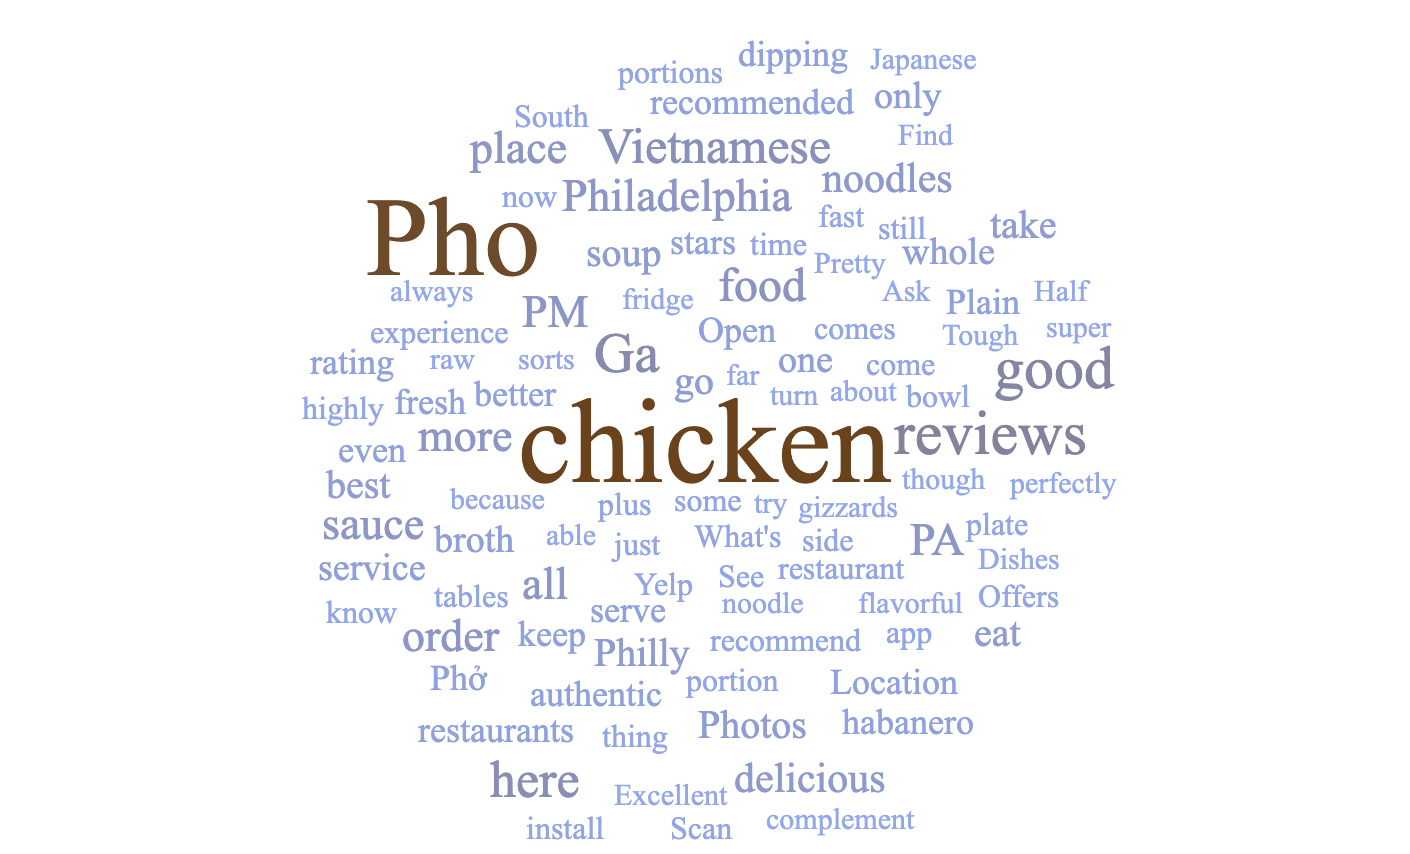

The place I chose to introduce is one of my favorite Vietnamese spots that truly hits home - Pho Ga Thanh Thanh (Gà means chicken in Vietnamese), located in South Philadelphia, where I lived for seven years. I chose this spot because, coming from Hanoi, I grew up with Northern-style pho, which is lighter, cleaner, and we do offer chicken-based pho. Most Vietnamese restaurants in the U.S. tend to serve the southern version, which leans heavier and usually features beef, so finding a place in Philadelphia that specializes in chicken pho felt both nostalgic and refreshing. 

Looking at the word cloud from Yelp reviews of this restaurant, a few clear themes emerge that reveal what attracts customers to the restaurant and where there might be room to improve. The most common words, like “pho,” “chicken,” “broth,” and “noodles,” confirm that the restaurant’s signature dish is the highlight for customers. The words “delicious,” “fresh,” and “sauce” demonstrate how much people care about the flavor and excellence of their ingredients. Meanwhile, “Philadelphia” and “Philly” suggest that the restaurant has become a familiar part of the local dining scene, resonating with the city’s community and food culture.

The largest words, “pho” and “chicken”, confirm that the restaurant’s specialty is what keeps people coming back. Mentions of “broth” and “noodles” show that customers pay attention to the balance of flavor and texture, which are important to a great bowl of pho. Positive comments like “fresh” and “delicious” reinforce the restaurant's consistent quality.

The words “order” and “experience” and “keep” indicate that service quality and dining atmosphere create subtle effects on customer perceptions. The service quality and ordering process need minor adjustments to create a better dining experience. The restaurant's connection to Philadelphia and Philly culture provides a chance to develop its local reputation through authentic Northern Vietnamese food offerings.

Overall, while the restaurant is already quite well-known in the area, the word cloud analysis suggests there’s still room to refine its marketing strategy. By highlighting its authentic Northern-style chicken pho and creating campaigns that resonate with international students or young professionals missing the taste of home (like me), Pho Ga Thanh Thanh could strengthen its connection with the community and attract an even broader audience.